<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/agricultura_pecuaria_precisao_aplicacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.image as mping
from mlxtend.plotting import plot_confusion_matrix

In [39]:
caminho_treinamento = '/content/sample_data/BD_treinamento'
caminho_validacao = '/content/sample_data/BD_validacao'
caminho_teste = '/content/sample_data/BD_teste'

In [40]:
batelada_treino = ImageDataGenerator().flow_from_directory(caminho_treinamento, target_size=(224,224), classes=['sadias', 'contaminadas'], batch_size=10)
batelada_validacao = ImageDataGenerator().flow_from_directory(caminho_validacao, target_size=(224,224), classes=['sadias', 'contaminadas'], batch_size=5)
batelada_teste = ImageDataGenerator().flow_from_directory(caminho_teste, target_size=(224,224), classes=['sadias', 'contaminadas'], batch_size=10)

Found 130 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [41]:
img, labels = next(batelada_treino)

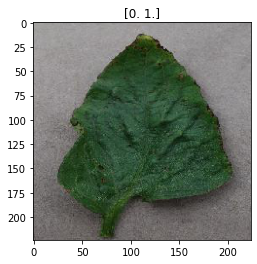

In [42]:
plt.figure()
plt.imshow(img[0].astype(np.uint8))
plt.title('{}'.format(labels[0]))
plt.show()

In [48]:
# Criando um modelo convolucional
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
batelada_treino

In [51]:
history = model.fit_generator(batelada_treino, 
                              steps_per_epoch=12, 
                              validation_data=batelada_validacao,
                              validation_steps=4,
                              epochs=10,
                              verbose = 2)

Epoch 1/10
12/12 - 3s - loss: 2758.3123 - accuracy: 0.5333 - val_loss: 855.0869 - val_accuracy: 0.6000
Epoch 2/10
12/12 - 3s - loss: 1241.3153 - accuracy: 0.4500 - val_loss: 370.9547 - val_accuracy: 0.6000
Epoch 3/10
12/12 - 3s - loss: 379.5273 - accuracy: 0.5833 - val_loss: 285.7470 - val_accuracy: 0.4500
Epoch 4/10
12/12 - 3s - loss: 132.7038 - accuracy: 0.7167 - val_loss: 163.8322 - val_accuracy: 0.7000
Epoch 5/10
12/12 - 3s - loss: 59.5203 - accuracy: 0.8750 - val_loss: 70.6900 - val_accuracy: 0.8000
Epoch 6/10
12/12 - 3s - loss: 28.2948 - accuracy: 0.8750 - val_loss: 79.9092 - val_accuracy: 0.7000
Epoch 7/10
12/12 - 3s - loss: 27.2704 - accuracy: 0.8833 - val_loss: 33.0630 - val_accuracy: 0.9000
Epoch 8/10
12/12 - 3s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 86.8546 - val_accuracy: 0.7000
Epoch 9/10
12/12 - 3s - loss: 0.3489 - accuracy: 0.9917 - val_loss: 113.1820 - val_accuracy: 0.7500
Epoch 10/10
12/12 - 3s - loss: 72.4445 - accuracy: 0.7750 - val_loss: 515.7091 - val_ac

In [52]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


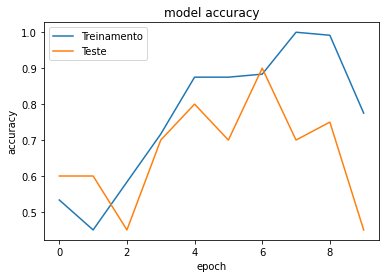

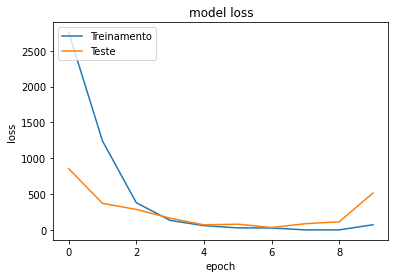

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc = 'upper left')
plt.show()

In [54]:
# Testando o modelo
teste_img, teste_labels = next(batelada_teste)

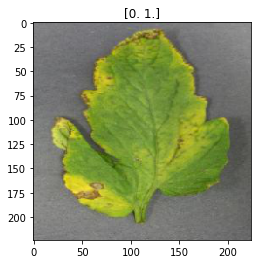

In [55]:
plt.figure()
plt.imshow(teste_img[0].astype(np.uint8))
plt.title('{}'.format(teste_labels[0]))
plt.show()

In [56]:
teste_labels = teste_labels[:,0]

In [57]:
previsao = model.predict_generator(batelada_teste, steps=1, verbose=0)
print(previsao)

Instructions for updating:
Please use Model.predict, which supports generators.
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [59]:
matriz_confusao = confusion_matrix(teste_labels, previsao[:, 0])
matriz_confusao

array([[6, 0],
       [4, 0]])

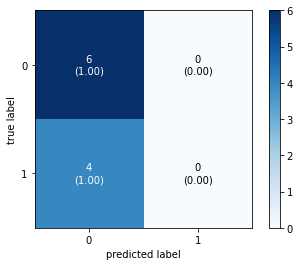

In [60]:
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao,
                                colorbar = True,
                                show_absolute = True,
                                show_normed = True,)

plt.show()